# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras as ks

## Data Preprocessing

### Training Image preprocessing

In [39]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7771 files belonging to 3 classes.


### Validation Image Preprocessing

In [40]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1439 files belonging to 3 classes.


In [41]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [42]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [49]:
cnn.add(tf.keras.layers.Flatten())

In [50]:
cnn.add(tf.keras.layers.Dense(units=200,activation='relu'))

In [51]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [52]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

### Compiling and Training Phase

In [53]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │         409,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,122,627 (19.54 MB)

 Trainable params: 5,122,627 (19.54 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 143s 588ms/step - accuracy: 0.5822 - loss: 0.8918 - val_accuracy: 0.9041 - val_loss: 0.2983
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 144s 591ms/step - accuracy: 0.8885 - loss: 0.3170 - val_accuracy: 0.9180 - val_loss: 0.2224
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 140s 576ms/step - accuracy: 0.9334 - loss: 0.1898 - val_accuracy: 0.9548 - val_loss: 0.1135
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 141s 579ms/step - accuracy: 0.9376 - loss: 0.1637 - val_accuracy: 0.9785 - val_loss: 0.0526
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 138s 568ms/step - accuracy: 0.9655 - loss: 0.0976 - val_accuracy: 0.9736 - val_loss: 0.0780
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 129s 531ms/step - accuracy: 0.9725 - loss: 0.0805 - val_accuracy: 0.9778 - val_loss: 0.0681
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 515ms/step - accuracy: 0.9815 - loss: 0.0557 - val_accuracy: 0.9576 - val_loss: 0.1192
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 124s 509ms/step - accuracy: 0.9701 -

## Evaluating Model

In [59]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

243/243 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.9896 - loss: 0.0282
Training accuracy: 0.9906061291694641


In [60]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.9907 - loss: 0.0277
Validation accuracy: 0.9867963790893555


### Saving Model

In [61]:
cnn.save('trained_plant_disease_model.keras')

In [62]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6896152496337891,
  0.9010423421859741,
  0.9317976832389832,
  0.9520010352134705,
  0.9664136171340942,
  0.9710462093353271,
  0.9817269444465637,
  0.9746493101119995,
  0.9828850626945496,
  0.9817269444465637],
 'loss': [0.709129810333252,
  0.28481799364089966,
  0.1881067454814911,
  0.13088518381118774,
  0.09534858912229538,
  0.08395788073539734,
  0.05470365285873413,
  0.07632699608802795,
  0.04961996152997017,
  0.06039431691169739],
 'val_accuracy': [0.9041000604629517,
  0.9179986119270325,
  0.954829752445221,
  0.9784572720527649,
  0.9735927581787109,
  0.9777623414993286,
  0.9576094746589661,
  0.98123699426651,
  0.9784572720527649,
  0.9867963790893555],
 'val_loss': [0.2982943654060364,
  0.22237467765808105,
  0.11352117359638214,
  0.05263107270002365,
  0.07802824676036835,
  0.06814517080783844,
  0.11915695667266846,
  0.04521499574184418,
  0.06552232801914215,
  0.04179883375763893]}

In [63]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [64]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

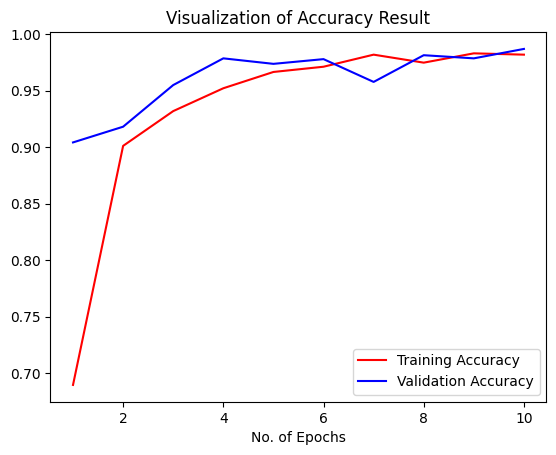

In [65]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [66]:
class_name = validation_set.class_names

In [67]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1439 files belonging to 3 classes.


In [68]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1439/1439 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step


In [69]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [70]:
Y_true

<tf.Tensor: shape=(1439,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [71]:
predicted_categories

<tf.Tensor: shape=(1439,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [73]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

       Apple___Black_rot       0.99      0.98      0.98       497
Apple___Cedar_apple_rust       0.99      0.99      0.99       440
         Apple___healthy       0.98      0.99      0.99       502

                accuracy                           0.99      1439
               macro avg       0.99      0.99      0.99      1439
            weighted avg       0.99      0.99      0.99      1439



### Confusion Matrix Visualization

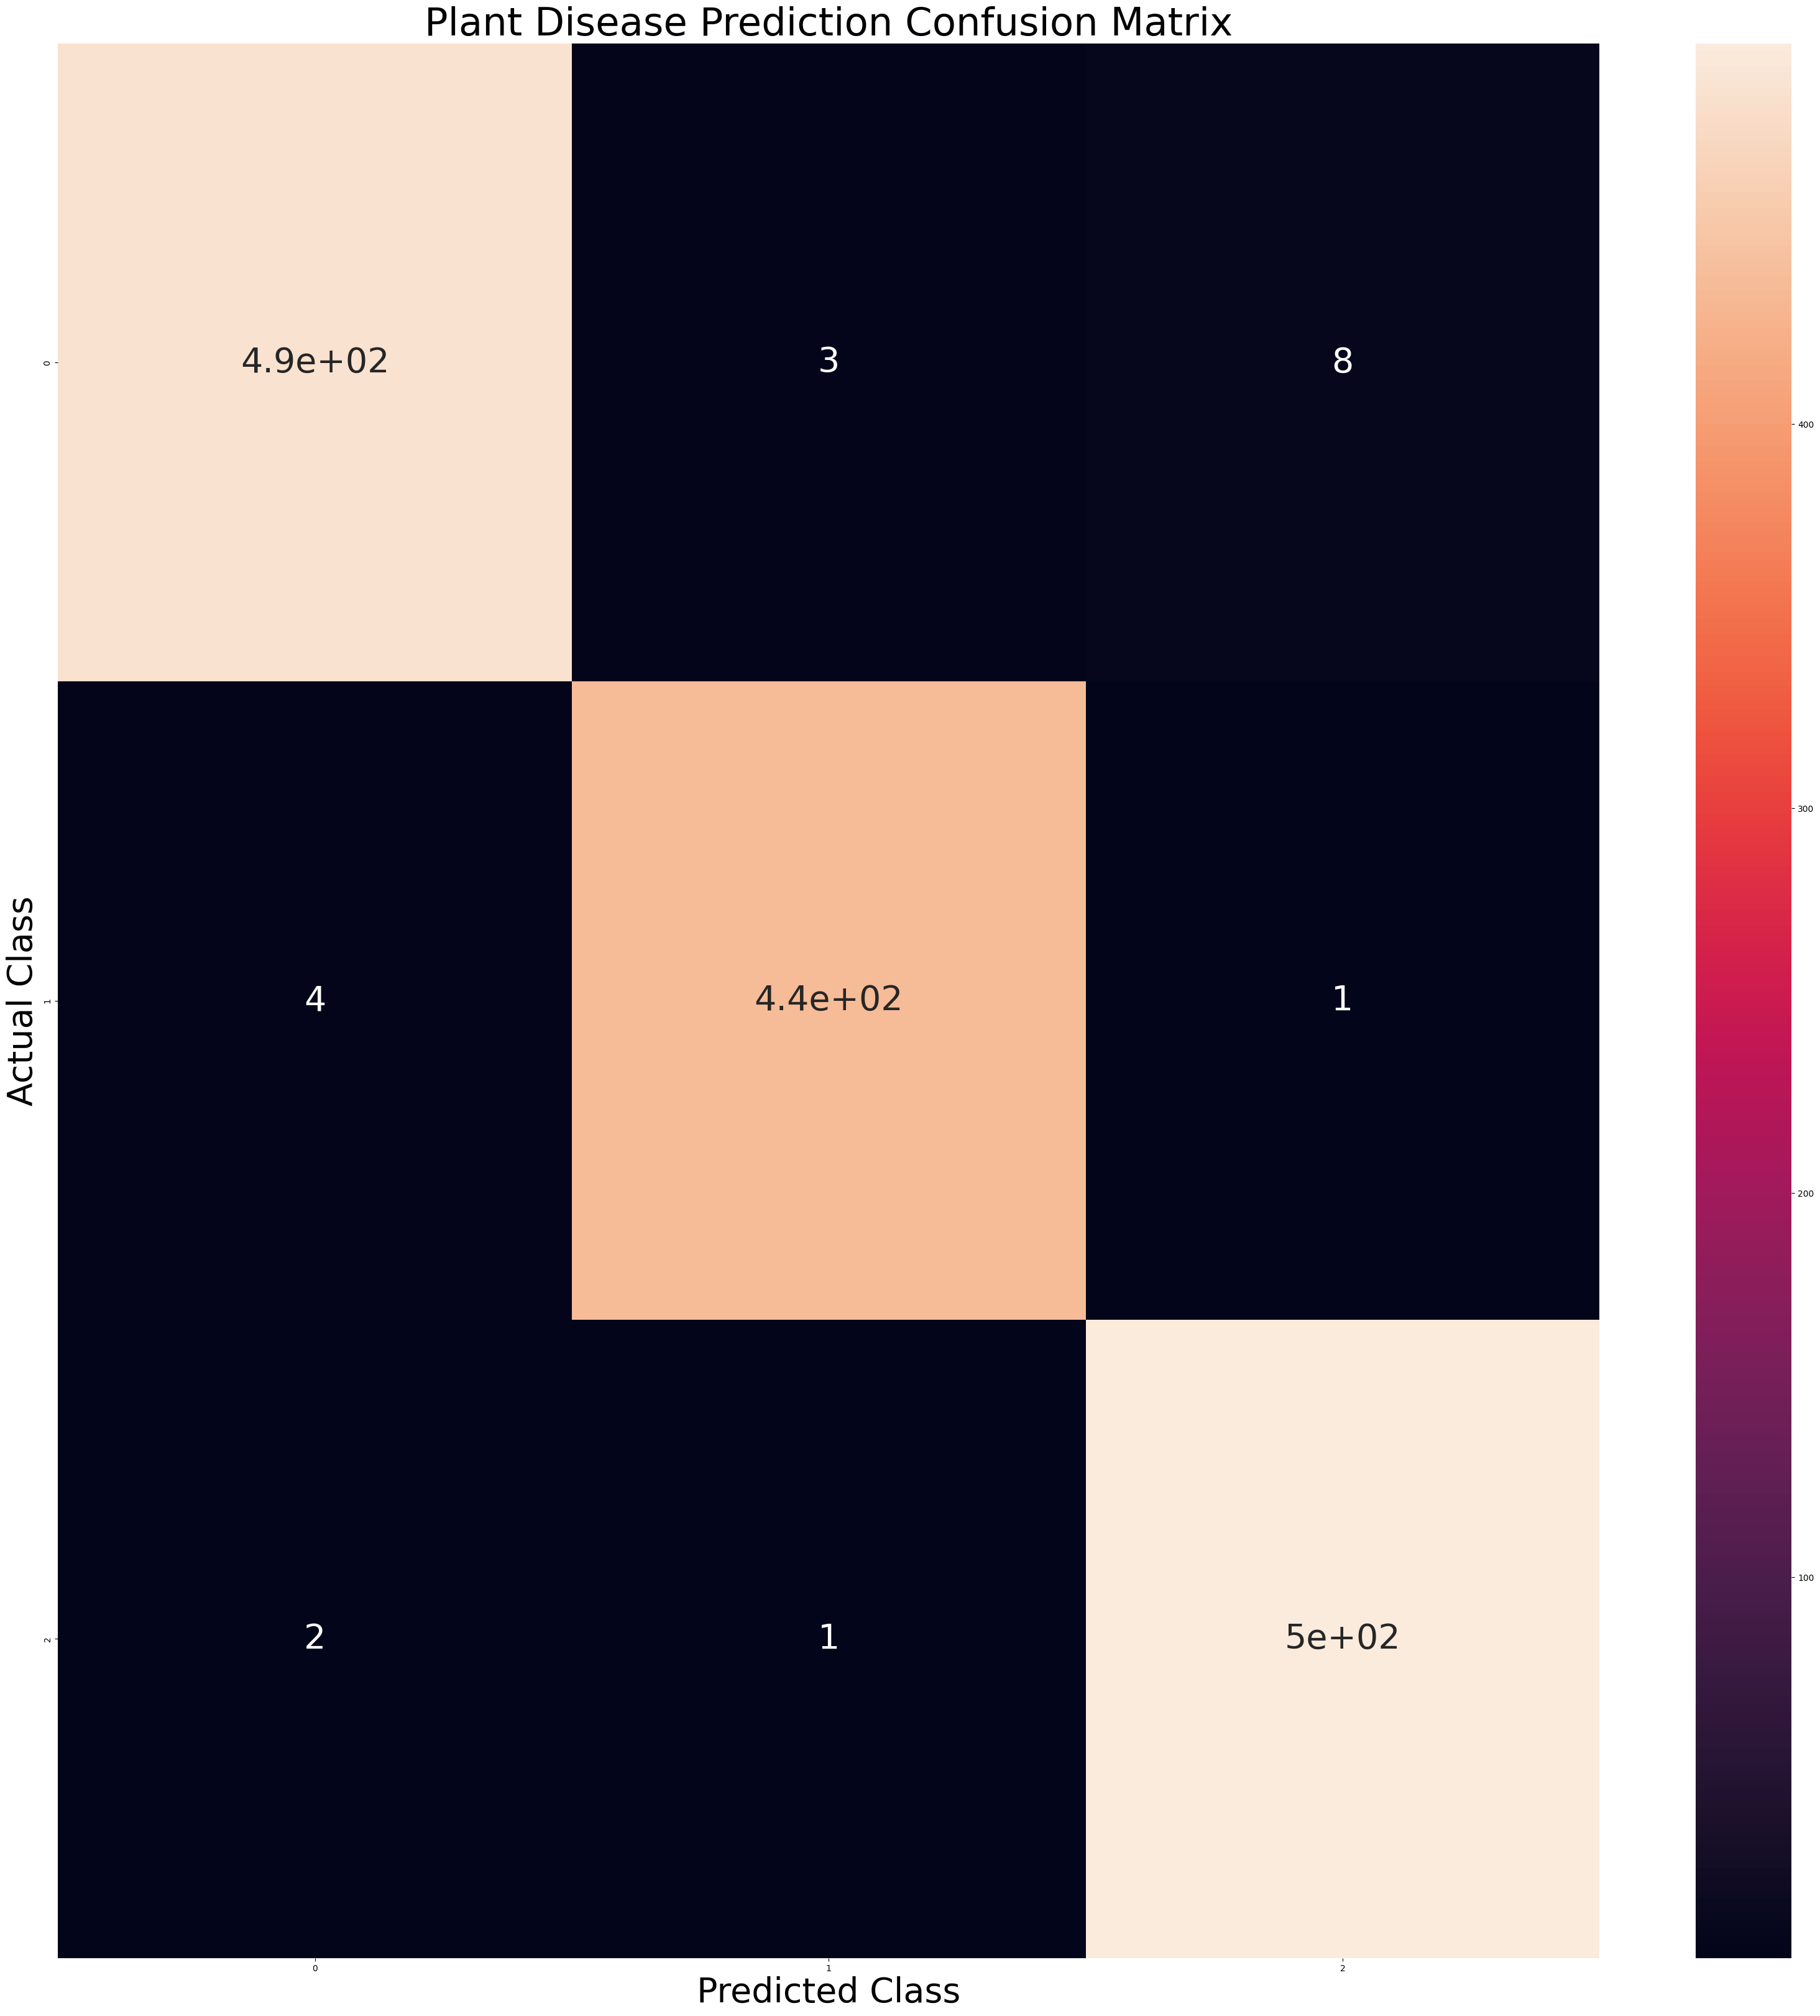

In [76]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

plt.xlabel('Predicted Class',fontsize = 40)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 45)
plt.show()